## Import libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from scipy.special import comb

In [43]:
def bernstein_poly(i, n, t):
    return comb(n, i) * (t**i) * ((1-t)**(n-i))

def bezier_curve(points, num=100):
    n = len(points) - 1
    t = np.linspace(0, 1, num)
    curve = np.zeros((num, 2))
    
    for i, point in enumerate(points):
        curve += np.outer(bernstein_poly(i, n, t), point)
    
    return curve

# Load parameters
with open('parameters/patient_bezier_params.json', 'r') as f:
    params = json.load(f)

features = ['simple_sugars', 'complex_sugars', 'fats', 'dietary_fibers', 'proteins', 'fast_insulin', 'slow_insulin']

# Create output directory
os.makedirs('visualizations', exist_ok=True)

# Color palette
colors = plt.cm.tab10(np.linspace(0, 1, len(features)))
color_map = dict(zip(features, colors))

def plot_patient_curves(patient):
    # Plot by patient - all features in one plot
    feature_params = params[patient]
    plt.figure(figsize=(12, 6))
    
    # Plot each feature
    for feature in features:
        if feature in feature_params:
            # Reshape parameters into control points
            control_points = np.array(feature_params[feature]).reshape(-1, 2)
            
            # Generate and plot Bezier curve
            curve = bezier_curve(control_points, num=100)
            plt.plot(curve[:, 0], curve[:, 1], '-', linewidth=2.5, 
                    label=feature, color=color_map[feature])
    
    plt.title(f'Patient {patient} - All Feature Effect Curves', fontsize=14)
    plt.xlabel('Time (hours)', fontsize=12)
    plt.ylabel('Effect Magnitude', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 12)  # Limit x-axis to 12 hours for better visibility
    plt.ylim(0, 1)   # Normalize y-axis
    
    # Add legend with better positioning
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

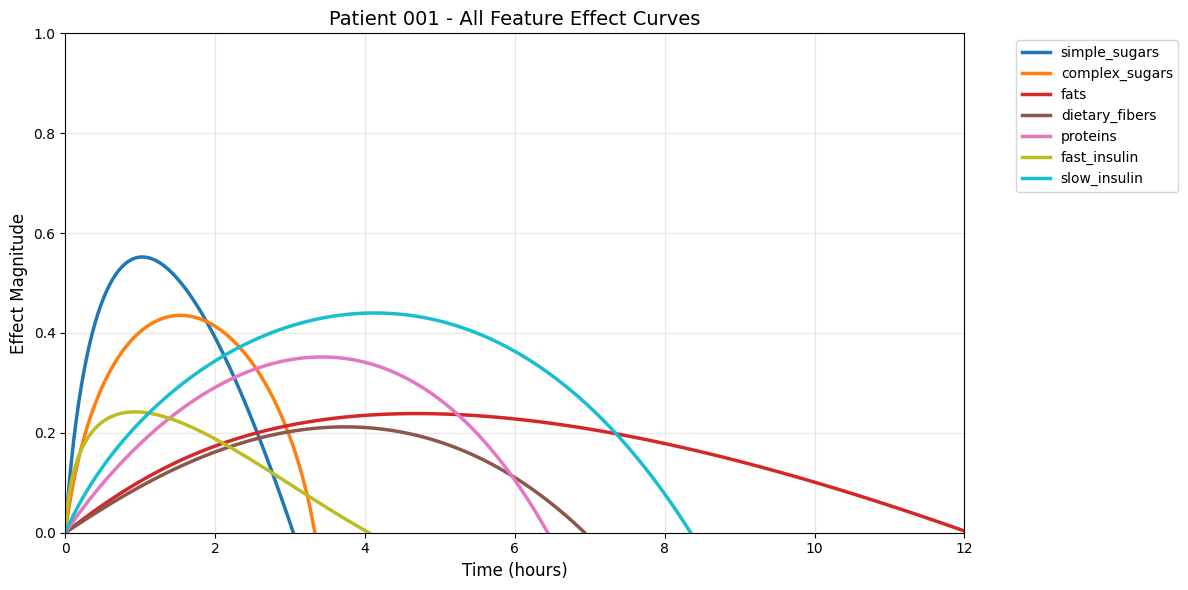

In [44]:
plot_patient_curves('001')

In [45]:
def plot_feature_curves(feature):
    plt.figure(figsize=(10, 6))
    
    for patient, feature_params in params.items():
        if feature in feature_params:
            control_points = np.array(feature_params[feature]).reshape(-1, 2)
            curve = bezier_curve(control_points, num=100)
            plt.plot(curve[:, 0], curve[:, 1], '-', linewidth=2, label=f'Patient {patient}')
    
    plt.title(f'{feature} - Effect Curves Across Patients', fontsize=14)
    plt.xlabel('Time (hours)', fontsize=12)
    plt.ylabel('Effect Magnitude', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

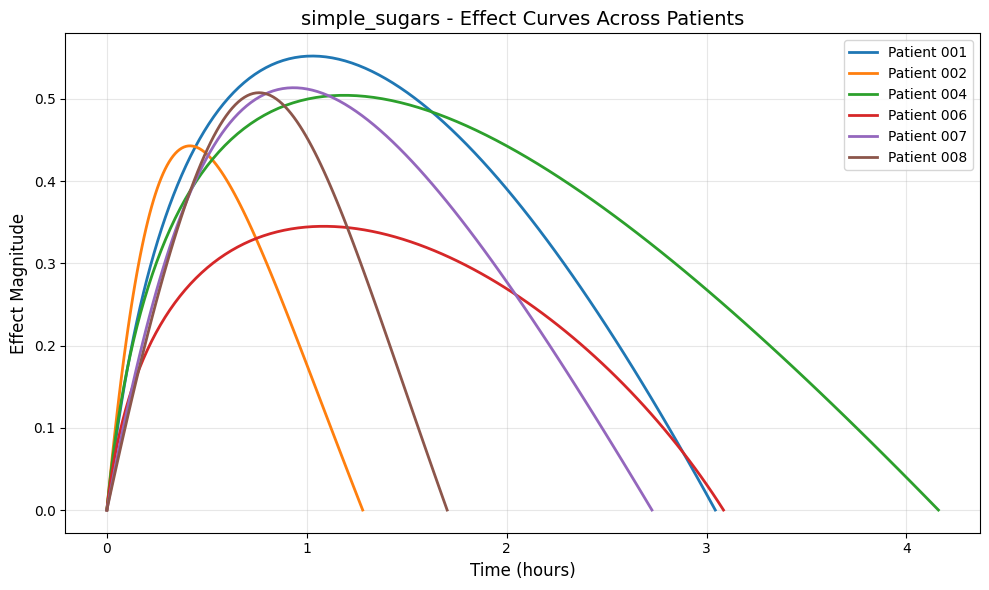

In [46]:
plot_feature_curves('simple_sugars')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


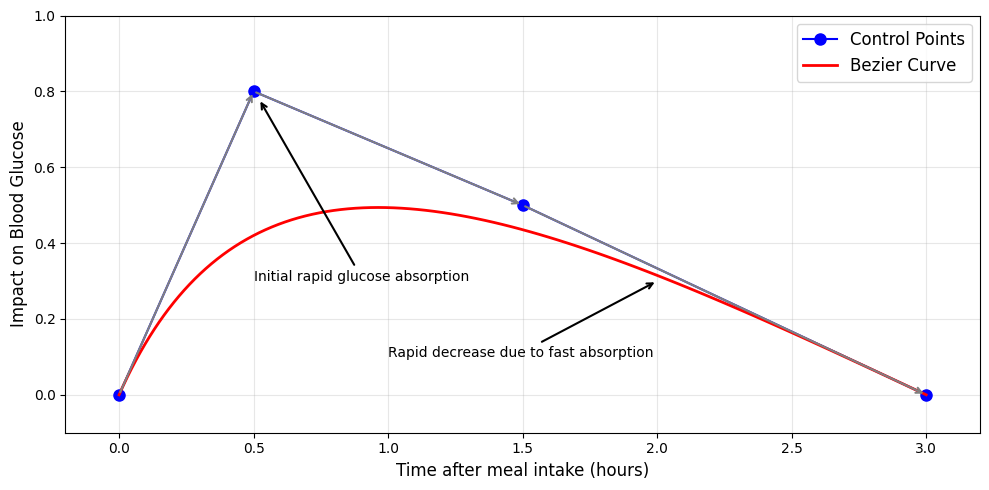

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def bernstein_poly(i, n, t):
    """Bernstein polynomial basis for Bezier curves"""
    return comb(n, i) * (t**i) * ((1-t)**(n-i))

def bezier_curve(points, num=100):
    """Generate Bezier curve from control points"""
    n = len(points) - 1  # Degree of curve is n
    t = np.linspace(0, 1, num)
    curve = np.zeros((num, 2))
    
    for i, point in enumerate(points):
        curve += np.outer(bernstein_poly(i, n, t), point)
    
    return curve

# Feature to visualize - using simple sugars as example
feature = 'simple_sugars'
control_points = np.array([
    [0.0, 0.0],   # Initial point (no effect at t=0)
    [0.5, 0.8],   # Quick rise
    [1.5, 0.5],   # Start of decline
    [3.0, 0.0]    # Return to baseline
])

# Generate curve
t = np.linspace(0, 1, 100)
curve = bezier_curve(control_points)

# Create visualization
plt.figure(figsize=(10, 5))

# Plot control points
plt.plot(control_points[:, 0], control_points[:, 1], 'o-', color='blue', 
         label='Control Points', markersize=8)

# Plot Bezier curve
plt.plot(curve[:, 0], curve[:, 1], '-', color='red', linewidth=2, 
         label='Bezier Curve')

# Add arrows to show direction
for i in range(len(control_points)-1):
    plt.annotate('', xy=control_points[i+1], xytext=control_points[i],
                arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))

plt.xlabel('Time after meal intake (hours)', fontsize=12)
plt.ylabel('Impact on Blood Glucose', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(-0.2, 3.2)
plt.ylim(-0.1, 1.0)

# Add annotation explaining the physiological meaning
plt.annotate('Initial rapid glucose absorption', xy=(0.52, 0.78), xytext=(0.5, 0.3),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'), fontsize=10)
plt.annotate('Rapid decrease due to fast absorption', xy=(2.0, 0.3), xytext=(1.0, 0.1),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'), fontsize=10)

plt.tight_layout()
plt.savefig('paper_images/bezier_methodology.eps', dpi=300)
plt.show()

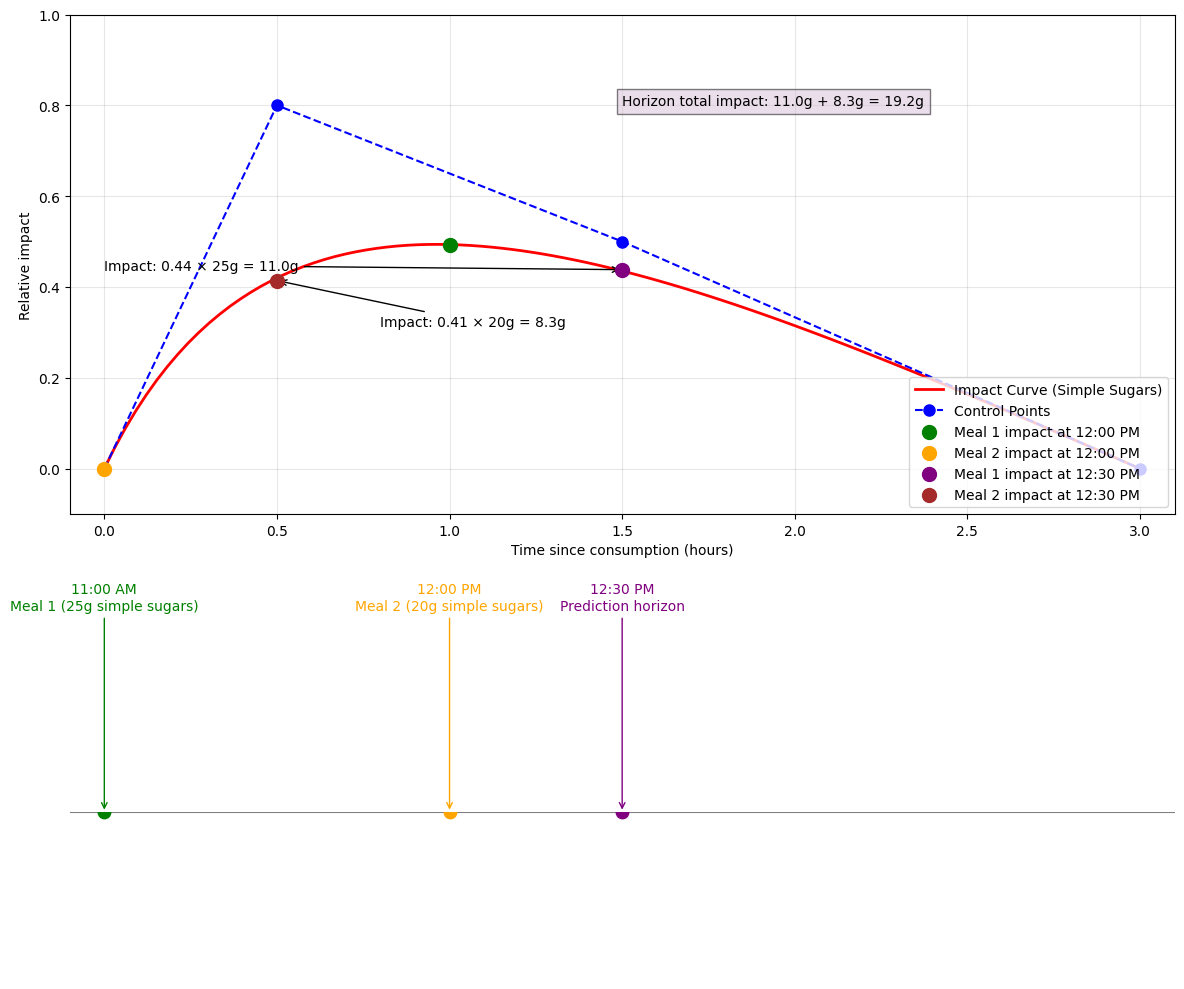

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def bernstein_poly(i, n, t):
    """Bernstein polynomial basis for Bezier curves"""
    return comb(n, i) * (t**i) * ((1-t)**(n-i))

def bezier_curve(points, num=100):
    """Generate Bezier curve from control points"""
    n = len(points) - 1
    t = np.linspace(0, 1, num)
    curve = np.zeros((num, 2))
    
    for i, point in enumerate(points):
        curve += np.outer(bernstein_poly(i, n, t), point)
    
    # Sort by x-values
    indices = np.argsort(curve[:, 0])
    curve = curve[indices]
    
    return curve

# Control points for simple sugars (from the script)
control_points = np.array([
    [0.0, 0.0],   # Initial point
    [0.5, 0.8],   # Quick rise
    [1.5, 0.5],   # Start of decline
    [3.0, 0.0]    # Return to baseline
])

# Generate curve with extended range
t_max = control_points[-1, 0]
curve = bezier_curve(control_points)
x_curve = np.linspace(0, t_max, 100)
y_interp = np.interp(x_curve, curve[:, 0], curve[:, 1])
curve = np.column_stack((x_curve, y_interp))

# Setup timeline
meal1_time = "11:00 AM"
meal2_time = "12:00 PM"
current_time = "12:00 PM"
horizon_time = "12:30 PM"

# Time deltas in hours
meal1_current_delta = 1.0    # 1 hour after meal1 (at current time)
meal2_current_delta = 0.0    # 0 hours after meal2 (at current time)
meal1_horizon_delta = 1.5    # 1.5 hours after meal1 (at horizon)
meal2_horizon_delta = 0.5    # 0.5 hours after meal2 (at horizon)

# Find impacts
meal1_current_idx = np.abs(curve[:, 0] - meal1_current_delta).argmin()
meal1_current_impact = curve[meal1_current_idx, 1]
meal2_current_idx = np.abs(curve[:, 0] - meal2_current_delta).argmin()
meal2_current_impact = curve[meal2_current_idx, 1]

meal1_horizon_idx = np.abs(curve[:, 0] - meal1_horizon_delta).argmin()
meal1_horizon_impact = curve[meal1_horizon_idx, 1]
meal2_horizon_idx = np.abs(curve[:, 0] - meal2_horizon_delta).argmin()
meal2_horizon_impact = curve[meal2_horizon_idx, 1]

# Amounts of simple sugars in each meal
meal1_sugar = 25  # 25g simple sugars in meal 1
meal2_sugar = 20  # 20g simple sugars in meal 2

# Calculate effective impacts
meal1_current_effective = meal1_current_impact * meal1_sugar
meal2_current_effective = meal2_current_impact * meal2_sugar
total_current_effective = meal1_current_effective + meal2_current_effective

meal1_horizon_effective = meal1_horizon_impact * meal1_sugar
meal2_horizon_effective = meal2_horizon_impact * meal2_sugar
total_horizon_effective = meal1_horizon_effective + meal2_horizon_effective

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot Bezier curve
ax1.plot(curve[:, 0], curve[:, 1], '-', color='red', linewidth=2, 
         label='Impact Curve (Simple Sugars)')
ax1.plot(control_points[:, 0], control_points[:, 1], 'o--', color='blue', 
         label='Control Points', markersize=8)

# Plot current time impacts
ax1.scatter([meal1_current_delta], [meal1_current_impact], color='green', s=100, zorder=5, 
            label=f'Meal 1 impact at {current_time}')
ax1.scatter([meal2_current_delta], [meal2_current_impact], color='orange', s=100, zorder=5, 
            label=f'Meal 2 impact at {current_time}')

# Plot horizon time impacts
ax1.scatter([meal1_horizon_delta], [meal1_horizon_impact], color='purple', s=100, zorder=5, 
            label=f'Meal 1 impact at {horizon_time}')
ax1.scatter([meal2_horizon_delta], [meal2_horizon_impact], color='brown', s=100, zorder=5, 
            label=f'Meal 2 impact at {horizon_time}')

# Add annotations



ax1.annotate(f'Impact: {meal1_horizon_impact:.2f} × {meal1_sugar}g = {meal1_horizon_effective:.1f}g', 
             xy=(meal1_horizon_delta, meal1_horizon_impact), 
             xytext=(meal1_horizon_delta-1.5, meal1_horizon_impact),
             arrowprops=dict(arrowstyle='->'))

ax1.annotate(f'Impact: {meal2_horizon_impact:.2f} × {meal2_sugar}g = {meal2_horizon_effective:.1f}g', 
             xy=(meal2_horizon_delta, meal2_horizon_impact), 
             xytext=(meal2_horizon_delta+0.3, meal2_horizon_impact-0.1),
             arrowprops=dict(arrowstyle='->'))

# Add total impact text boxes

ax1.text(1.5, 0.8, f"Horizon total impact: {meal1_horizon_effective:.1f}g + {meal2_horizon_effective:.1f}g = {total_horizon_effective:.1f}g",
         bbox=dict(facecolor='thistle', alpha=0.5))

# Timeline in second subplot
events = [
    (0, meal1_time, "Meal 1 (25g simple sugars)", "green"),
    (1, meal2_time, "Meal 2 (20g simple sugars)", "orange"),
    (1.5, horizon_time, "Prediction horizon", "purple")
]

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
for pos, label, desc, color in events:
    ax2.scatter([pos], [0], color=color, s=80, zorder=5)
    ax2.annotate(f"{label}\n{desc}", 
                 xy=(pos, 0), xytext=(pos, 0.3), 
                 ha='center', va='bottom', color=color,
                 arrowprops=dict(arrowstyle='->', color=color))

# Set labels and limits
ax1.set_xlabel('Time since consumption (hours)')
ax1.set_ylabel('Relative impact')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.1, 1.0)
ax1.set_xlim(-0.1, 3.1)
ax1.legend(loc='lower right')

ax2.set_ylim(-0.25, 0)
ax2.set_xlim(-0.1, 3.1)
ax2.axis('off')

plt.tight_layout()
plt.show()

In [39]:
df = pd.read_csv('evaluation_metrics_bezier.csv')
df['Patient'] = df['Patient'].astype(str)

In [40]:
# Create aggregated data for the table
agg_data = df.groupby(['Approach', 'Prediction Horizon'])['RMSE'].agg(['mean', 'std']).reset_index()

# Pivot the data to get approaches as columns
pivot_data = agg_data.pivot(index='Prediction Horizon', columns='Approach', values=['mean', 'std'])

# Format the table in LaTeX style with mean±std in the same cell
latex_content = "\\begin{table}[h]\n"
latex_content += "\\centering\n"
latex_content += "\\begin{tabular}{c|c|c}\n"
latex_content += "\\hline\n"
latex_content += "Prediction & pixtral-large-latest & nollm \\\\\n"
latex_content += "Horizon & RMSE (mean $\\pm$ std) & RMSE (mean $\\pm$ std) \\\\\n"
latex_content += "\\hline\n"

for ph in sorted(pivot_data.index.unique()):
    pixtral_mean = pivot_data[('mean', 'pixtral-large-latest')].loc[ph]
    pixtral_std = pivot_data[('std', 'pixtral-large-latest')].loc[ph]
    nollm_mean = pivot_data[('mean', 'nollm')].loc[ph]
    nollm_std = pivot_data[('std', 'nollm')].loc[ph]
    latex_content += f"{ph} & {pixtral_mean:.2f} $\\pm$ {pixtral_std:.2f} & {nollm_mean:.2f} $\\pm$ {nollm_std:.2f} \\\\\n"

latex_content += "\\hline\n"
latex_content += "\\end{tabular}\n"
latex_content += "\\caption{RMSE comparison between approaches across different prediction horizons}\n"
latex_content += "\\label{tab:rmse_comparison}\n"
latex_content += "\\end{table}"

# Save to .tex file
with open('rmse_comparison_table.tex', 'w') as f:
    f.write(latex_content)

# Display the regular DataFrame for reference
df

,Approach,Prediction Horizon,Patient,Day,Hour,RMSE
0,pixtral-large-latest,6,1,4,0,4.841661
1,pixtral-large-latest,6,1,4,1,4.039551
2,pixtral-large-latest,6,1,4,2,5.503225
3,pixtral-large-latest,6,1,4,3,8.766756
4,pixtral-large-latest,6,1,4,4,12.354036
...,...,...,...,...,...,...
2301,nollm,24,8,4,3,9.155331
2302,nollm,24,8,4,4,17.189748
2303,nollm,24,8,4,5,20.475519
2304,nollm,24,8,4,6,47.702456
